In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [178]:
np.random.seed(42)
num_samples_per_cluster = 100
mean_cluster1 = [2, 2]
cov_cluster1 = [[1, 0.5], [0.5, 1]] 
cluster1_samples = np.random.multivariate_normal(mean_cluster1, cov_cluster1, num_samples_per_cluster)
mean_cluster2 = [-2, -2]
cov_cluster2 = [[1, -0.5], [-0.5, 1]] 
cluster2_samples = np.random.multivariate_normal(mean_cluster2, cov_cluster2, num_samples_per_cluster)
X = np.vstack([cluster1_samples, cluster2_samples])

np.random.shuffle(X)

print(X, X.shape)

[[ 1.48607002  0.08421896]
 [ 2.01581581  2.31736315]
 [ 0.84359908  0.61782278]
 [-2.69309794 -2.134133  ]
 [ 2.43745877  1.19171999]
 [ 1.04286296  1.37161407]
 [ 2.52107492  1.37810462]
 [-1.25925465 -2.52428676]
 [-1.00065944 -2.14690722]
 [-1.34748421 -1.89354656]
 [ 0.61821198  1.97445201]
 [-1.22701734 -2.83250801]
 [ 1.26197299  2.71550707]
 [-0.91893684 -2.61895969]
 [ 2.50780655  2.32214757]
 [-4.82330499 -1.12878281]
 [ 1.34678711  2.17397036]
 [-2.25310718 -2.13220642]
 [ 3.17824724  2.36243695]
 [ 1.14944254  2.4565853 ]
 [ 1.87036376  2.92748599]
 [ 2.16543721  1.66196156]
 [ 2.91431729  0.92674838]
 [-2.30807671 -0.87841366]
 [-2.48479616 -2.5177332 ]
 [-2.06626131 -2.42673962]
 [-1.923235   -1.95943762]
 [ 1.60984272  1.95629093]
 [ 2.72001381  3.03426115]
 [-2.63947141 -1.92425315]
 [-1.99704187 -1.22832407]
 [ 0.16055421 -2.80668184]
 [-2.36526654 -2.2863338 ]
 [ 3.05181224  3.24867348]
 [ 2.41598797  2.52691056]
 [ 2.01168515  2.36879772]
 [-2.60712209 -0.60121522]
 

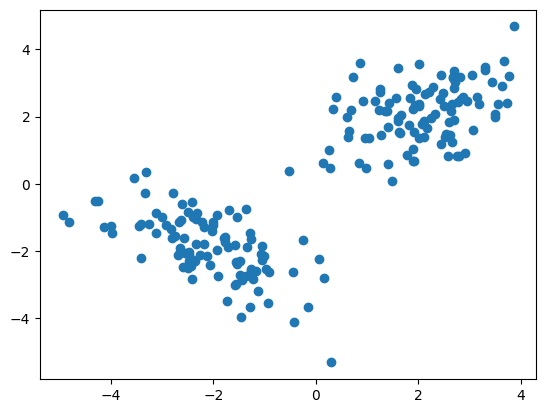

In [179]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [204]:
def generate_centroids(X, k):
    centroids = np.zeros((k,2))

    for centroid in range(k):
        rand_index = random.randint(0, X.shape[0] - 1)
        new_centroid = X[rand_index]

        if new_centroid in centroids:
            centroid - 1
            continue
        else: centroids[centroid] = new_centroid

    return centroids


def compute_distance(x, centroid):
    return np.sum(np.abs(x - centroid))


def calc_distortion(X, centroids, points):
    summ = 0
    m = X.shape[0]

    for ci, centroid in enumerate(centroids):
        centroid_points = points[ci]
        summ += np.sum(np.abs(np.array(centroid_points) - centroid))

    return summ / m


def perform_kmeans(X, iterations=100, k=2):
    centroids = generate_centroids(X, k)

    for i in range(iterations):
        points = [[], []]
        
        for sample in X:
            distances = [compute_distance(sample, centroid) for centroid in centroids]
            ci = np.argmin(distances)
            chosen_centroid = centroids[ci]
            points[ci].append(sample)

        print(centroids)
        
        for ci in range(k):
            new_centroids = np.zeros((k,2))
            new_centroids[ci] = np.mean(points[ci])
        
        if np.array_equal(new_centroids, centroids): break
        else:
            centroids = new_centroids

    print(f"Distortion: {calc_distortion(X, centroids, points)}")
    return points

In [215]:
points = perform_kmeans(X, iterations=4000)

[[-2.50049414 -0.84811461]
 [-2.40422953 -2.27293218]]
[[ 0.          0.        ]
 [-2.04454315 -2.04454315]]
[[ 0.          0.        ]
 [-2.02915958 -2.02915958]]
Distortion: 2.886876428374734


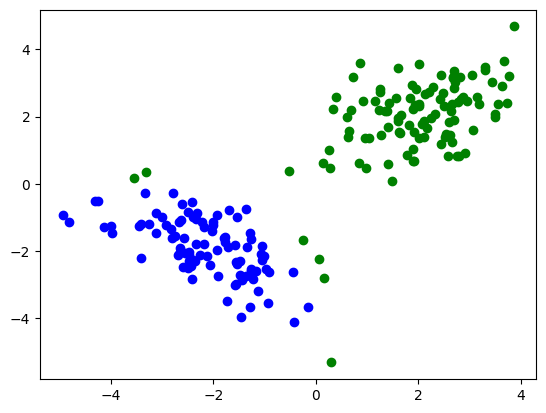

In [216]:
plt.scatter([point[0] for point in points[0]], [point[1] for point in points[0]], c='green')
plt.scatter([point[0] for point in points[1]], [point[1] for point in points[1]], c='blue')
plt.show()